# Distribution of the sum of two random variables is the convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [78]:
samples = 10000
delta = 0.1

# First distribution
x_unif = np.arange(-10, 0, step=delta)
r_unif = scipy.stats.uniform(loc=-9, scale=4)
dens_unif = r_unif.pdf(x_unif)
dens_unif = dens_unif / np.sum(dens_unif)
rand_unif = r_unif.rvs(size=samples)

# Second distribution
x_norm = np.arange(-0, 15, step=delta)
r_norm = scipy.stats.norm(9, 2)
dens_norm = r_norm.pdf(x_norm)
dens_norm = dens_norm / np.sum(dens_norm)
rand_norm = r_norm.rvs(size=samples)

# Convolution
xmin = x_unif[0]+ x_norm[0]
xmax = x_unif[-1]+ x_norm[-1]
num_items = x_unif.shape[0] + x_norm.shape[0] - 1
x_conv = np.linspace(xmin, xmax, num_items)
conv = np.convolve(dens_norm, dens_unif)
dens_conv = conv / np.sum(conv)

# Sum of random variables
s = rand_unif + rand_norm
x_sum = np.append(x_conv - delta/2, np.max(x_conv) + delta/2)
hist_sum = np.histogram(s, bins=x_sum)
x_sum = x_conv
dens_sum = hist_sum[0] / np.sum(hist_sum[0])

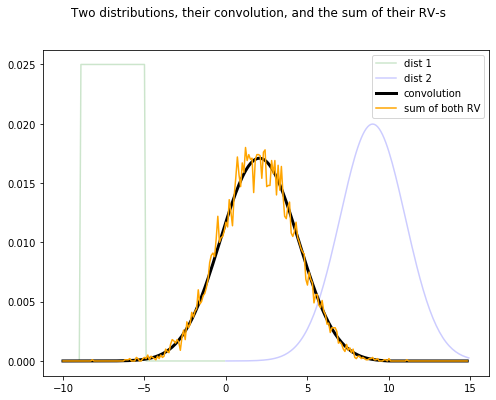

In [83]:
f, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(x_unif, dens_unif, color='green', alpha=0.2, label='dist 1')
ax.plot(x_norm, dens_norm, color = 'blue', alpha=0.2, label='dist 2')
ax.plot(x_conv, dens_conv, color = 'black', lw=3, label='convolution')
ax.plot(x_sum, dens_sum, color='orange', label='sum of both RV')
ax.legend(loc='upper right')

f.suptitle('Two distributions, their convolution, and the sum of their RV-s');

# Notes

I had some difficultie figuring out the x axis elements correctly.

In this implementation, what I figured out is that it works provided:  

 - both empirical distribution vectors equaly spaced
 - they can have different ranges $[x_{1}^{min}, x_{1}^{max}]$ and $[x_{2}^{min}, x_{2}^{max}]$ and different number of elements $n_1$ and $n_2$

 - then the convolution ranges in the interval $[x_{1}^{min}+x_{2}^{min}, x_{1}^{max}+x_{2}^{max}]$ and has $(n_1 + n_2 + 1)$ elements with same spacing as the original vectors

## References

 - [https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve](https://docs.scipy.org/doc/numpy/reference/generated/numpy.convolve.html?highlight=convolve#numpy.convolve)
 - [https://en.wikipedia.org/wiki/Convolution](https://en.wikipedia.org/wiki/Convolution)
 
 Concertely, wikipedia shows the definition for discrete convolution over a finite set of elements:
 
 ![https://wikimedia.org/api/rest_v1/media/math/render/svg/fddacde29cbcb3c6fca263493335c31a4d2ebce2](https://wikimedia.org/api/rest_v1/media/math/render/svg/fddacde29cbcb3c6fca263493335c31a4d2ebce2)